<a href="https://colab.research.google.com/github/Samin-Sadaf7/NN_works/blob/main/NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
!unzip /content/digit-recognizer.zip

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [53]:
data = pd.read_csv('/content/train.csv')

In [54]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

In [56]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [57]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255.

In [58]:
_, m_train = X_train.shape

In [59]:
def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(Z, 0)

def Softmax(Z):
  A = np.exp(Z)/ sum(np.exp(Z))
  return A

def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 =Softmax(Z2)
  return Z1, A1, Z2, A2

def one_hot(Z):
  one_hot_Z = np.zeros((Z.size, Z.max()+1))
  one_hot_Z[np.arange(Z.size), Z] =1
  one_hot_Z = one_hot_Z.T
  return one_hot_Z

def deriv_ReLU(Z):
  return Z > 0

def backward_prop(Z1, A1, Z2, A2, W1, W2,X, Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m* dZ2.dot(A1.T)
  db2 = 1/m *np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = 1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1)
  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1- alpha*dW1
  b1 = db1 - alpha*db1
  W2 = W2 - alpha*dW2
  b2 = b2 - alpha*db2
  return W1, b1, W2, b2

In [60]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y)/Y.size

def gradient_descent(X, Y, alpha, iterations):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

    if i%10 == 0:
      print("Iteration: ", i)
      predictions = get_predictions(A2)
      print(get_accuracy(predictions, Y))
  return W1, b1, W2, b2

In [61]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)

Iteration:  0
[0 4 6 ... 7 7 0] [4 3 0 ... 2 5 4]
0.07946341463414634
Iteration:  10
[0 3 9 ... 4 6 0] [4 3 0 ... 2 5 4]
0.2780975609756098
Iteration:  20
[9 3 0 ... 4 8 0] [4 3 0 ... 2 5 4]
0.38202439024390245
Iteration:  30
[4 3 0 ... 4 8 0] [4 3 0 ... 2 5 4]
0.4289268292682927
Iteration:  40
[4 3 0 ... 4 8 0] [4 3 0 ... 2 5 4]
0.4713170731707317
Iteration:  50
[4 3 0 ... 4 8 6] [4 3 0 ... 2 5 4]
0.5090975609756098
Iteration:  60
[4 3 0 ... 4 8 6] [4 3 0 ... 2 5 4]
0.543219512195122
Iteration:  70
[4 3 0 ... 4 8 6] [4 3 0 ... 2 5 4]
0.5758048780487804
Iteration:  80
[4 3 0 ... 4 8 6] [4 3 0 ... 2 5 4]
0.6058292682926829
Iteration:  90
[4 3 0 ... 4 8 4] [4 3 0 ... 2 5 4]
0.6313658536585366
Iteration:  100
[4 3 0 ... 4 8 4] [4 3 0 ... 2 5 4]
0.6523414634146342
Iteration:  110
[4 3 0 ... 4 8 4] [4 3 0 ... 2 5 4]
0.6706829268292683
Iteration:  120
[4 3 0 ... 4 5 4] [4 3 0 ... 2 5 4]
0.686829268292683
Iteration:  130
[4 3 0 ... 4 5 4] [4 3 0 ... 2 5 4]
0.7014146341463414
Iteration:  140
[

In [62]:
def make_predictions(X, W1, b1, W2, b2):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
  predictions = get_predictions(A2)
  return predictions

def test_predictions(index, W1, b1, W2, b2):
  current_image = X_train[:, index, None]
  prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
  label = Y_train[index]
  print("Prediction: ", prediction)
  print("Label: ", label)

  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()

Prediction:  [4]
Label:  4


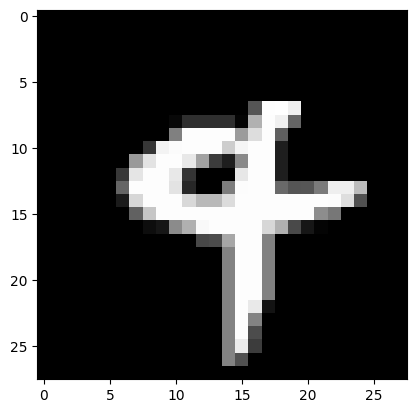

Prediction:  [3]
Label:  3


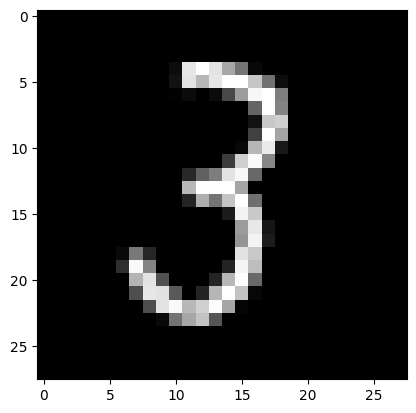

Prediction:  [0]
Label:  0


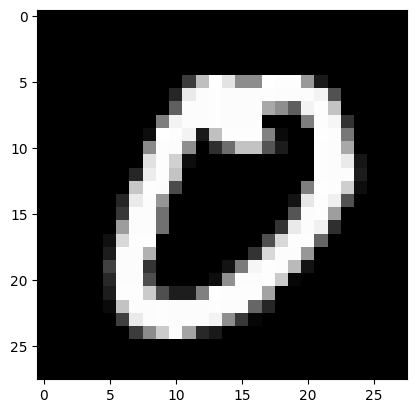

Prediction:  [5]
Label:  5


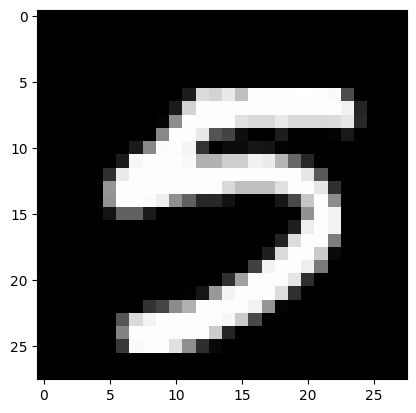

In [63]:
test_predictions(0, W1, b1, W2, b2)
test_predictions(1, W1, b1, W2, b2)
test_predictions(2, W1, b1, W2, b2)
test_predictions(3, W1, b1, W2, b2)

In [64]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 7 1 9 2 2 7 2 0 4 7 1 9 7 4 2 9 0 6 2 6 0 0 1 2 2 1 0 5 4 3 1 1 7 9 1 2
 2 4 8 6 2 4 0 8 0 9 8 8 8 2 0 1 5 4 4 1 7 6 9 9 1 1 7 1 8 2 2 7 3 6 5 8 8
 6 5 9 0 2 5 4 1 1 1 3 8 2 9 4 6 6 5 0 8 8 1 0 3 6 7 0 2 1 2 4 8 9 4 1 0 4
 8 4 9 2 5 7 3 3 8 1 8 3 9 5 5 8 2 0 7 5 5 2 8 2 3 5 2 6 4 2 1 7 9 4 0 1 0
 4 9 3 9 7 4 1 8 0 9 6 1 8 5 1 6 6 7 5 4 4 7 3 7 6 2 9 7 4 4 3 3 2 7 1 6 9
 1 0 6 0 0 4 6 5 1 1 0 3 7 3 7 4 1 9 7 4 1 4 9 3 4 7 1 3 7 5 0 8 8 7 3 5 1
 1 5 6 3 2 4 1 4 8 2 9 0 1 7 0 1 5 2 9 3 7 4 6 3 1 2 1 6 7 4 1 3 8 0 8 0 9
 7 5 2 8 6 3 8 6 4 5 3 7 7 8 8 1 0 2 3 5 1 1 1 0 0 9 0 7 1 1 2 5 5 5 5 4 2
 1 0 1 5 9 5 4 6 4 2 9 9 6 5 3 3 3 1 2 2 3 8 9 3 1 3 8 9 3 8 0 1 0 9 7 3 8
 2 8 6 5 9 6 9 8 2 1 1 0 3 5 6 5 6 5 5 6 4 6 7 5 3 0 8 3 5 2 7 6 4 8 4 6 8
 5 3 0 9 4 6 0 4 7 6 0 9 8 3 1 4 2 4 6 2 4 9 2 3 1 4 4 5 5 6 5 3 0 2 2 6 7
 2 7 8 1 6 4 8 8 0 7 5 2 2 1 2 4 1 7 2 0 3 8 5 2 9 9 6 1 5 7 3 0 3 1 4 0 3
 7 3 7 1 1 8 5 9 6 4 4 7 8 9 2 1 8 4 0 7 4 3 1 2 8 6 1 6 8 7 6 3 0 4 8 3 1
 2 1 5 1 8 2 5 7 2 8 7 5 

0.85